In [9]:
# House Rent
# Training Data
## Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Import Datasets
train = pd.read_csv('data.csv')
#renaming improper variable names
train = train.rename(columns={'1stFlrSF':'firstFlrSF','2ndFlrSF':'scndFlrSF'})
## EDA
c=[] #Columns
t=[] # Total NA
i=[] # Col index
p =[] # % Nans
tn = [] # Total Non-Nans
for j in range(train.shape[1]): # j : column index
    tna = sum(train.iloc[:,j].isna()) # Total NAns
    if tna>=1:
        tNna = train.shape[0] - tna
        name = train.columns[j] #Column Name
        colna = round(tna/train.shape[0],4) # % NAn
        c.append(name) # COlumn name
        i.append(j) # Index
        t.append(tna) # Tot. NAns
        p.append(colna) # Percenatge of Nans
        tn.append(tNna) # Tot. Non-Nans
NAdf = pd.DataFrame({'Column Index':i,'Name':c,'Total Nan':t,'Total Non-Nans':tn,'% Nan':p})
NAdf

,Column Index,Name,Total Nan,Total Non-Nans,% Nan
0,3,LotFrontage,259,1201,0.1774
1,6,Alley,1369,91,0.9377
2,25,MasVnrType,872,588,0.5973
3,26,MasVnrArea,8,1452,0.0055
4,30,BsmtQual,37,1423,0.0253
5,31,BsmtCond,37,1423,0.0253
6,32,BsmtExposure,38,1422,0.0260
7,33,BsmtFinType1,37,1423,0.0253
8,35,BsmtFinType2,38,1422,0.0260
9,42,Electrical,1,1459,0.0007


In [10]:
#From above we get to know the number of NAns in columns with percentage of missing values.
## Numerical Data Type
train_num = train.select_dtypes(include='number')
train_num = train_num.drop('Id',axis=1)
train_num.shape
#### Discrete and continous datas
disc=[]
cont =[]
for i in train_num.columns:
    if train_num[i].nunique()<=25:
        disc.append(i)
    else:
        cont.append(i)
print('No. of Discrete Variables:',len(disc),'\nNo. of Cont. variables:',len(cont))        
train_disc = train.loc[:,disc]
cont = [i for i in cont if i not in ['YearBuilt','YearRemodAdd','GarageYrBlt','SalePrice']]

No. of Discrete Variables: 18 
No. of Cont. variables: 19


In [11]:
### Categorical Variables
# Creating new Dataframe Train__Catagorical:
train_cat = []
for i in train.columns:
    if np.dtype(train[i]) == 'object':
        train_cat.append(train.loc[:,i])

train_cat= pd.DataFrame(train_cat)
train_cat= train_cat.T # Transpose
train_cat.shape

(1460, 43)

In [12]:
## Feature Engineering
#### Filling NAns ofCategorical Varibales:
train_cat_na = [i for i in train_cat.columns if train[i].isna().sum()>=1]
train_cat_na = train[train_cat_na]
print(train_cat_na.columns)

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')


In [13]:
#By looking at the Data Description we come to know about the Nans as:
#1. Alley---- has Nan value as 'None'
#2. MasVnrType---- has Nan value as 'None'
#3. BsmtQual---- has Nan value as 'No Basement'-------
#4. BsmtCond---- has Nan value as 'No Basement'-------
#5. BsmtExposure---- has Nan value as 'No Basement'-------- Basement===='No Basement'
#6. BsmtFinType1---- has Nan value as 'No Basement'-------
#7. BsmtFinType2---- has Nan value as 'No Basement'------
#8. Electrical---- has Nan value as modal value
#9. FireplaceQu---- has Nan value as 'No Fireplace'
#10. GarageType---- has Nan value as 'No Garage'----------
#11. GarageFinish---- has Nan value as 'No Garage'-----------Garage======'No Garage'
#12. GarageQual---- has Nan value as 'No Garage'---------
#13. GarageCond---- has Nan value as 'No Garage'----------
#14. PoolQC---- has Nan value as 'No Pool'
#15. Fence---- has Nan value as 'No Fence'
#16. MiscFeature---- has Nan value as 'None'

#Therefore we got all the missing values for categorical variables

# Getting rid of NAn Values:
train['Alley'] = train['Alley'].fillna('None')
train['MasVnrType'] = train['MasVnrType'].fillna('None')
for i in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    train[i]= train[i].fillna('No Basement')
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
train['FireplaceQu'] = train['FireplaceQu'].fillna('No Fireplace')
for i in ['GarageType','GarageFinish','GarageQual','GarageCond']:
    train[i] = train[i].fillna('No Garage')
train['PoolQC'] = train['PoolQC'].fillna('No Pool') 
train['Fence'] = train['Fence'].fillna('No Fence')
train['MiscFeature'] = train['MiscFeature'].fillna('None')
train[train_cat.columns].isna().sum().sum()
#Therefore, till now we fixed Nans for Categorical Variables.

0

In [14]:
##### Seperating Ordinal and Nominal from Categorical variables:
#First, of all we will sepearate the nominal data and ordinal data.
# Ordinal Data
train_ord = train[['LotShape','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond',
                   'BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual',
                   'Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive',
                   'PoolQC','Fence','CentralAir','MSZoning','Utilities','LandContour','Alley',
                   'LotConfig','Condition1','Condition2','Foundation','Electrical']]
# Nominal Data
train_nom = [col for col in train_cat.columns if col not in train_ord.columns]
train_nom = train[train_nom]

In [15]:
##### Encoding Ordinal Data
train_ord_enc = train[['LotShape','LandSlope','ExterQual','ExterCond',
                        'HeatingQC','KitchenQual',
                        'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                        'CentralAir','Functional','GarageFinish','PavedDrive','PoolQC','Fence',
                       'FireplaceQu','GarageQual','GarageCond','MSZoning','Utilities','LandContour',
                       'Alley','LotConfig','Condition1','Condition2','Foundation','Electrical']]


# Encoding Ordinal Data
from sklearn.preprocessing import OrdinalEncoder
## First creating a map for different ordinal data:
ord1 = ['IR3','IR2','IR1','Reg'] #LotShape
ord2 = ['Gtl','Mod','Sev'] #LandSlope
ord3 = ['Po','Fa','TA','Gd','Ex'] #ExterQual,ExterCond,HeatingQC,KitchenQual
ord4 = ['No Basement','Po','Fa','TA','Gd','Ex'] #BsmtQual,BsmtCond,
ord5 = ['No Basement','No','Mn','Av','Gd'] #BsmtExposure
ord6 = ['No Basement','Unf','LwQ','Rec','BLQ','ALQ','GLQ'] #BsmtFinType1,BsmtFinType2
ord7 = ['N','Y'] #CentralAir
ord8 = ['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'] #Functional
ord9 = ['No Garage','Unf','RFn','Fin'] #GarageFinish
ord10 = ['N','P','Y'] #PavedDrive
ord11 = ['No Pool','Fa','TA','Gd','Ex'] #PoolQC
ord12 = ['No Fence','MnWw','GdWo','MnPrv','GdPrv'] #Fence
ord13 = ['No Fireplace','Po','Fa','TA','Gd','Ex'] #FireplaceQu
ord14 = ['No Garage','Po','Fa','TA','Gd','Ex'] #GarageQual,GarageCond
ord15 = ['FV','A','RL','RP','RM','RH','I','C (all)']
ord16 = ['ELO','NoSeWa','NoSewr','AllPub']
ord17 = ['Low','HLS','Bnk','Lvl']
ord18 = ['None','Grvl','Pave']
ord19 = ['CulDSac','Corner','Inside','FR2','FR3']
ord20 = ['Norm','Artery','Feedr','PosN','PosA','RRAn','RRAe','RRNe','RRNn']
ord21 = ['Slab','Wood','BrkTil','CBlock','PConc','Stone']
ord22 = ['FuseP','FuseA','FuseF','Mix','SBrkr']
# Creating Categories
categories = [ord1,ord2,ord3,ord3,ord3,ord3,ord4,ord4,ord5,ord6,ord6,ord7,ord8,ord9,
             ord10,ord11,ord12,ord13,ord14,ord14,ord15,ord16,ord17,ord18,ord19,
             ord20,ord20,ord21,ord22]
# Setting up OrdinalEncoder
ordenc = OrdinalEncoder(categories=categories)
ord_enc = ordenc.fit_transform(train_ord_enc)
train_ord_enc = pd.DataFrame(ord_enc,columns=train_ord_enc.columns)
#train_ord_enc = train_ord_enc.stack().reset_index(drop=True)
#train_ord_enc.head(2)
for i in train_ord_enc.columns:
    train[i] = train_ord_enc[i].values

In [16]:
##### Encoding Nominal Data:

# Creating DF of Nominal Data:
train_nom_enc = [i for i in train_cat.columns if i not in train_ord_enc]
train_nom_enc = train[train_nom_enc]
# Encoding the Nominal Data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_nom_enc = train_nom_enc.apply(le.fit_transform)
for i in train_nom_enc.columns:
    train[i] = train_nom_enc[i].values
# Finally we get the required Categorically encoded Dataframe but with Nans of Numerical Datas
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,2.0,65.0,8450,1,0.0,3.0,3.0,3.0,...,0,0.0,0.0,1,0,2,2008,8,4,208500
1,2,20,2.0,80.0,9600,1,0.0,3.0,3.0,3.0,...,0,0.0,0.0,1,0,5,2007,8,4,181500


##### Since now we may use transformations for data.
##### Therefore, dividing data in two :train, testing

In [17]:
testing = train.sample(frac=0.2,random_state=1)
train = train.drop(testing.index)

In [18]:
SP_test = testing['SalePrice']
# Selecting continous columns
continuous_cols = train.select_dtypes(include=['float64', 'int64']).columns
# Fill NaN values with the mode in continuous columns
for i in continuous_cols:
    mode = train[i].mode()[0]
    train[i] = train[i].fillna(value=mode)

print(train.isna().sum().sum())

0


In [19]:
#### Data Transformation/ Standardization
# First we drop ID from data
train.drop(['Id'],axis=1,inplace=True)
##### Log Transformation
max_target = train['SalePrice'].max()
min_target = train['SalePrice'].min()
print(min_target, max_target)

34900 755000


In [ ]:

train[cont] = np.log1p(train[cont])
train['SalePrice'] = np.log1p(train['SalePrice'])
min_SP_train = train['SalePrice'].min()
max_SP_train = train['SalePrice'].max()
##### Standard Scaler Transformation:
min_val_train,max_val_train = [],[]
# MinMaxScaler:
for column in train.columns:
    min_val = train[column].min()
    min_val_train.append(min_val)
    max_val = train[column].max()
    max_val_train.append(max_val)
    train[column] = ((train[column] - min_val) / (max_val - min_val))

#We have log trasformed,scaled and encoded the Data 
min_max_train = pd.DataFrame({'min':min_val_train,'max':max_val_train}).transpose()
min_max_train.columns = train.columns
min_max_train.index = ['min','max']

In [168]:
continuous_cols = testing.select_dtypes(include=['float64', 'int64']).columns
# Find the mode of each continuous column
for i in continuous_cols:
    mode = testing[i].mode()[0]
    testing[i] = testing[i].fillna(value=mode)
print(testing.isna().sum().sum())

#### Data Transformation/ Standardization

# First we drop ID and SalePrice from data
testing.drop(['Id'],axis=1,inplace=True)

#### Imputung Nans Numerical Variables
##### Log Transformation
testing[cont] = np.log1p(testing[cont])
testing['SalePrice'] = np.log1p(testing['SalePrice'])
#testing = np.log1p(testing)
min_SP_testing = testing['SalePrice'].min()
max_SP_testing = testing['SalePrice'].max()
##### Standard Scaler Transformation:
min_val_testing,max_val_testing = [],[]
# MinMaxScaler:
for column in testing.columns:
    min_val = testing[column].min()
    min_val_testing.append(min_val)
    max_val = testing[column].max()
    max_val_testing.append(max_val)
    testing[column] = ((testing[column] - min_val) / (max_val - min_val))


#We have log trasformed,scaled and encoded the Data 

0


In [169]:
# Saving maximum and minimum value of each variable for future transformation
min_max_testing = pd.DataFrame({'min':min_val_testing,'max':max_val_testing}).transpose()
min_max_testing.columns = testing.columns
min_max_testing.index = ['min','max']

In [170]:
### Feature Selection
y_target = train['SalePrice'] #target Variable
y_testing = testing['SalePrice']
train.drop('SalePrice',axis=1,inplace=True)
testing.drop('SalePrice',axis=1,inplace=True)

In [171]:
testing.shape

(292, 79)

##### Feature Selection

In [172]:
##### RandomForestRegressor:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1,max_depth= 7, min_samples_split=5,
                              min_samples_leaf= 2, n_estimators=200)
model.fit(train,y_target)
importances = model.feature_importances_
feature = pd.Series(importances, index=train.columns).sort_values(ascending=False).head(10).index.tolist()
print(feature)

['OverallQual', 'GrLivArea', 'GarageCars', 'firstFlrSF', 'TotalBsmtSF', 'GarageArea', 'YearBuilt', 'BsmtFinSF1', 'LotArea', 'GarageType']


In [173]:
train_FINAL = train[feature]
testing = testing[train_FINAL.columns]
train_FINAL.head(2)

,OverallQual,GrLivArea,GarageCars,firstFlrSF,TotalBsmtSF,GarageArea,YearBuilt,BsmtFinSF1,LotArea,GarageType
0,0.666667,0.577436,0.5,0.355839,0.774668,0.869159,0.949275,0.759508,0.366271,0.166667
1,0.555556,0.469935,0.5,0.502753,0.819153,0.845088,0.753623,0.797188,0.391245,0.166667


In [174]:
## Model Fitting:

### Train and Validation Set:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import catboost as cb
import logging# Set the logging level to WARNING or higher
logging.getLogger("catboost").setLevel(logging.WARNING)

X_train,X_test,y_train,y_test = train_test_split(train_FINAL,y_target,test_size=0.2,random_state=0)

svr = SVR(kernel='rbf')
rndReg = RandomForestRegressor(n_estimators=10,random_state=1)
elNet = ElasticNet(alpha=0.0001,l1_ratio=0.5)
dTree = DecisionTreeRegressor(max_depth=5,min_samples_split=4,min_samples_leaf=4)
lin_reg = LinearRegression()
model_GBR =  GradientBoostingRegressor(random_state=1)
model_list,rmse,acc,R2Score,AvgCVScore,AvgCVRMSE = [],[],[],[],[],[]
models =[lin_reg,dTree,elNet,rndReg,svr,model_GBR]
for model in models:
    print(model)
    model_list.append(model.fit(X_train,y_train))
    model1 = model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    rmse.append(np.sqrt(mean_squared_error(y_test,y_predict)))
    acc.append(lin_reg.score(X_test,y_test))
    R2Score.append(r2_score(y_predict,y_test))
    #10-fold Cross Validation
    scores = cross_val_score(model1,X_train, y_train, scoring='r2', cv = 10)
    AvgCVScore.append(scores.mean())
    AvgCVRMSE.append(np.sqrt(-cross_val_score(model1,X_train, y_train,
                                      scoring='neg_mean_squared_error', cv = 10)).mean())

model_score = pd.DataFrame({'Model':['Linear Regression','Descision Tree','Elastic Net',
                                     'Random Forest','SVM','GBR'],
                            'RMSE':rmse,'Accuracy':acc,'Avg CV RMSE':AvgCVRMSE,
                            'Avg CV Score': AvgCVScore,'R2 Score':R2Score})
print(model_score)

LinearRegression()
DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=4)
ElasticNet(alpha=0.0001)
RandomForestRegressor(n_estimators=10, random_state=1)
SVR()
GradientBoostingRegressor(random_state=1)
               Model      RMSE  Accuracy  Avg CV RMSE  Avg CV Score  R2 Score
0  Linear Regression  0.050253  0.859661     0.049886      0.832256  0.825506
1     Descision Tree  0.068119  0.859661     0.063892      0.734182  0.684550
2        Elastic Net  0.050376  0.859661     0.049887      0.832582  0.822761
3      Random Forest  0.055909  0.859661     0.054023      0.805425  0.773473
4                SVM  0.055687  0.859661     0.055574      0.797748  0.796612
5                GBR  0.050597  0.859661     0.051268      0.821771  0.828957


               Model      RMSE  Accuracy   R2Score
0  Linear Regression  0.051764  0.867957  0.858091
1     Descision Tree  0.080947  0.677105  0.661483
2        Elastic Net  0.051733  0.868111  0.856809
3      Random Forest  0.070694  0.753717  0.741020
4                SVM  0.060271  0.820986  0.786610
5                GBR  0.061317  0.814718  0.775778


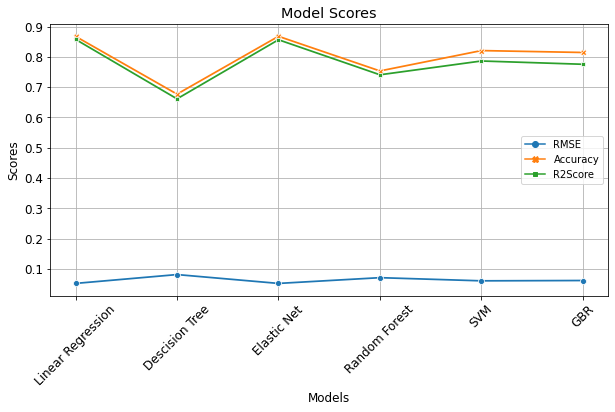

In [175]:
#### Testing the model
rmse,acc,R2Score= [],[],[]
models =[lin_reg,dTree,elNet,rndReg,svr,model_GBR]
for model in model_list:
    y_predict = model.predict(testing)
    rmse.append(np.sqrt(mean_squared_error(y_testing,y_predict)))
    acc.append(model.score(testing,y_testing))
    R2Score.append(r2_score(y_predict,y_testing))

model_score = pd.DataFrame({'Model':['Linear Regression','Descision Tree','Elastic Net',
                                     'Random Forest','SVM','GBR'],
                            'RMSE':rmse,
                            'Accuracy':acc,
                            'R2Score':R2Score
                           })
print(model_score)

# Set the Model column as the index
model_score.set_index('Model', inplace=True)
plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 12})
sns.lineplot(data=model_score,dashes=False,linewidth=1.75 ,markers=True)
plt.title('Model Scores')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend(loc='best', prop={'size': 10})
plt.grid(True)
plt.show()

#### Hyperparameter tuning

In [176]:
import numpy as np
import pandas as pd
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}
# Create an SVM regressor
svm_model = svm.SVR()

# Define the mean squared error scorer
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform grid search using cross-validation and the MSE scorer
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring=scorer)
grid_search.fit(train_FINAL, y_target)
# Print the best hyperparameters and the corresponding MSE value
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best MSE: ", np.sqrt(grid_search.best_score_))

Best Hyperparameters:  {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best MSE:  nan


C:\Users\HP\AppData\Local\Temp\ipykernel_14080\3665299412.py:24: RuntimeWarning: invalid value encountered in sqrt
  print("Best MSE: ", np.sqrt(grid_search.best_score_))


In [177]:
# Fitting the model on test data [testing] after HyperParameter Tuning:
model = SVR(C=100,gamma=0.001,kernel='rbf',epsilon=0)
model.fit(X_train,y_train)
y_predict = model.predict(testing)
print('RMSE on test data after HyperParameter tuning: ',np.sqrt(mean_squared_error(y_testing,y_predict)))
print('Accuracy on test data after HyperParameter tuning: ',model.score(testing,y_testing))

RMSE on test data after HyperParameter tuning:  0.05163013985577475
Accuracy on test data after HyperParameter tuning:  0.86863755790483


In [178]:
y_predict_inverse= np.exp((y_predict*(max_SP_train-min_SP_train))+min_SP_train)
rmse = np.sqrt(mean_squared_error(SP_test, y_predict_inverse))
x = max_target - min_target
rmse_norm = rmse/x
print("RMSE:", rmse)
print('RMSE Normalized:', rmse_norm)
y_diff = SP_test-y_predict_inverse
print('Avg: ',round(y_diff.mean(),2),'\nMax: ',round(y_diff.max(),2),'\nMin: ',round(y_diff.min(),2))

RMSE: 25177.654205522023
RMSE Normalized: 0.03496410804821833
Avg:  8804.11 
Max:  142410.61 
Min:  -64645.4


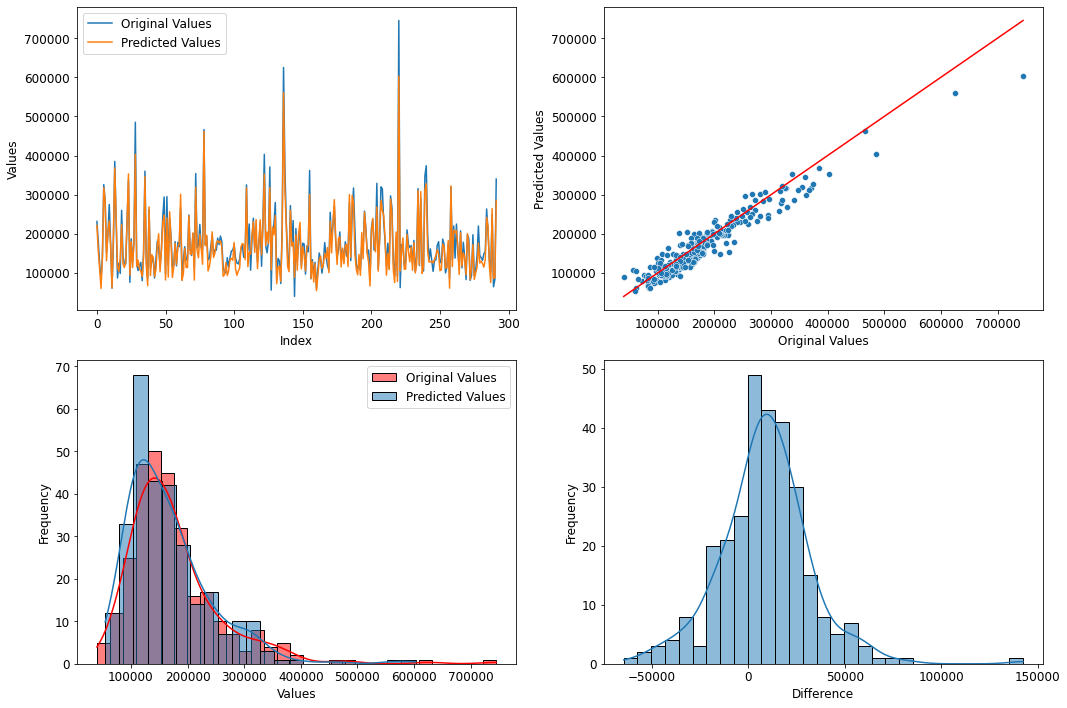

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have predicted and original values stored in separate lists or arrays
predicted_values = y_predict_inverse
original_values = SP_test

# Create a figure with a single set of axes
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Line plot
axes[0, 0].plot(range(len(original_values)), original_values, label='Original Values')
axes[0, 0].plot(range(len(predicted_values)), predicted_values, label='Predicted Values')
axes[0, 0].set_xlabel('Index')
axes[0, 0].set_ylabel('Values')
axes[0, 0].legend()

# Plot 2: Scatter plot
sns.scatterplot(x=original_values, y=predicted_values, ax=axes[0, 1])
axes[0, 1].set_xlabel('Original Values')
axes[0, 1].set_ylabel('Predicted Values')
axes[0, 1].plot([min(original_values), max(original_values)], [min(original_values), max(original_values)], color='red')

# Plot 3: Histograms
sns.histplot(original_values, ax=axes[1, 0], label='Original Values', color='red', kde=True)
sns.histplot(predicted_values, ax=axes[1, 0], label='Predicted Values', kde=True)
axes[1, 0].set_xlabel('Values')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()

# Plot 4: Difference histogram
sns.histplot(y_diff, ax=axes[1, 1], kde=True)
axes[1, 1].set_xlabel('Difference')
axes[1, 1].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


In [180]:
X_train.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'firstFlrSF', 'TotalBsmtSF',
       'GarageArea', 'YearBuilt', 'BsmtFinSF1', 'LotArea', 'GarageType'],
      dtype='object')

In [181]:
# Testing the finalised SVM Model for individual datapoints
df = pd.DataFrame(np.array([[7],[1710],[2],[856],[856],[548],[2003],[706],[84500],[1]]).reshape(1,10),
                  columns=['OverallQual', 'GrLivArea', 'GarageCars', 'firstFlrSF', 'TotalBsmtSF',
                           'GarageArea', 'YearBuilt','BsmtFinSF1', 'LotArea', 'GarageType'])
feature_DEPLOY = train_FINAL.columns
# log Tranformation
log_tr = [i for i in feature_DEPLOY if i in cont]
df[log_tr] = np.log1p(df[log_tr])
min_max_train[df.columns]

,OverallQual,GrLivArea,GarageCars,firstFlrSF,TotalBsmtSF,GarageArea,YearBuilt,BsmtFinSF1,LotArea,GarageType
min,1.0,5.814131,0.0,5.814131,0.000000,0.000000,1872.0,0.000000,7.170888,0.0
max,10.0,8.638171,4.0,8.453827,8.717846,7.257708,2010.0,8.638525,12.279537,6.0


In [182]:
#MinMax Scaling
for column in df.columns:
    df[column] =  (df[column] - min(min_max_train[column])) / (max(min_max_train[column]) - min(min_max_train[column]))
print(df.head(2))
pred = model.predict(df)
print('Predicted Value is: ',pred[0])
orig = np.expm1((pred*(max_SP_train-min_SP_train))+min_SP_train)
print('Original value predicted: ',orig[0])
# for this entry in data given SalePrice is 208500
print('Difference: ',208500-orig[0])

   OverallQual  GrLivArea  GarageCars  firstFlrSF  TotalBsmtSF  GarageArea  \
0     0.666667   0.577436         0.5    0.355839     0.774668    0.869159   

   YearBuilt  BsmtFinSF1   LotArea  GarageType  
0   0.949275    0.759508  0.816973    0.166667  
Predicted Value is:  0.6628945563554356
Original value predicted:  267838.60381956486
Difference:  -59338.60381956486


In [31]:
df= pd.read_csv('data.csv')
from sklearn.model_selection import train_test_split
train, test  = train_test_split(df, test_size=0.2)
enc = ['LotShape','LandSlope','ExterQual','ExterCond',
            'HeatingQC','KitchenQual',
            'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'CentralAir','Functional','GarageFinish','PavedDrive','PoolQC','Fence',
            'FireplaceQu','GarageQual','GarageCond','MSZoning','LandContour',
            'Alley','LotConfig','Condition1','Condition2','Foundation','Electrical']
features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'GarageArea', 'firstFlrSF', 'BsmtFinSF1', 'MSZoning', 'CentralAir', 'OverallCond']
enc = [i for i in enc if i in features]
nom = ['Street', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle',
                    'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Heating',
                    'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']
nom = [i for i in nom if i in features]
if nom is None:
    print(nom, 'Yes')

def load_object(file_path):
    import dill
    with open(file_path,'rb') as file_obj:
        obj = dill.load(file_obj)
        return obj
    
data = load_object('artifacts/min_max_data.pkl')
print(data)

In [183]:
#Exporting model for Deployment:
import pickle
pickle.dump(model,open('model.pkl','wb'))